In [88]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [89]:
def static(budget: int, bet: int):
    flip = random.randint(0,1)  #0: Heads, 1: Tails
    return [budget - 1] if flip else [budget + 1]

In [92]:
def martingale(budget: int, original_bet: int):
    bet = original_bet
    history = []
    while budget >= bet:
        flip = random.randint(0,1)
        if flip == 0:   #Heads
            return history + [budget + bet]
        else:   #Tails
            budget -= bet
            bet *= 2
        history.append(budget)
    return history

In [93]:
def martingale_alt(budget: int, original_bet: int):
    bet = original_bet
    while budget >= bet:
        flip = random.randint(0,1)
        if flip == 0:   #Heads
            return [budget + bet]
        else:   #Tails
            budget -= bet
            bet *= 2
    return [budget]

In [95]:
def simulate_strategy(budget: int, original_bet: int, goal: int, strategy):
    history = [budget]

    while budget > 0 and budget < goal:
        history += strategy(budget, original_bet)
        budget = history[-1]
    return history

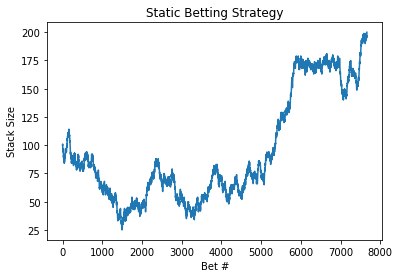

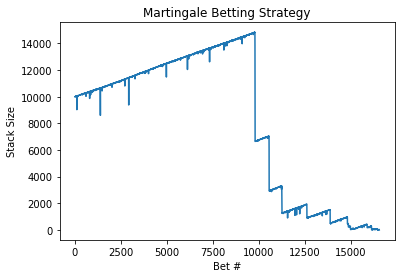

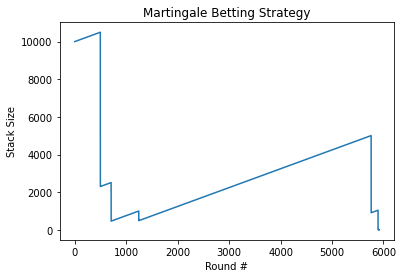

In [107]:
plt.title("Static Betting Strategy")
plt.xlabel("Bet #")
plt.ylabel("Stack Size")
res = simulate_strategy(100, 1, 200, static)
x = [i for i in range(len(res))]
plt.plot(x,res)
plt.show()

plt.title("Martingale Betting Strategy")
plt.xlabel("Bet #")
plt.ylabel("Stack Size")
res = simulate_strategy(10000, 1, 20000, martingale)
x = [i for i in range(len(res))]
plt.plot(x, res)
plt.show()

plt.title("Martingale Betting Strategy")
plt.xlabel("Round #")
plt.ylabel("Stack Size")
res = simulate_strategy(10000, 1, 20000, martingale_alt)
x = [i for i in range(len(res))]
plt.plot(x, res)
plt.show()